In [1]:
#importing necessary packages
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn import decomposition
%matplotlib inline
sns.set(color_codes=True)

In [3]:
train_data = pd.read_csv("train.csv",index_col=0)
test_data = pd.read_csv("test.csv",index_col=0)
y_train = train_data["SalePrice"]
y_train = np.log1p(y_train)
#y_test = test_data[""]
del train_data["SalePrice"]
train_data['MSSubClass'] = train_data['MSSubClass'].astype(basestring)
data = pd.concat((train_data, test_data), axis=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


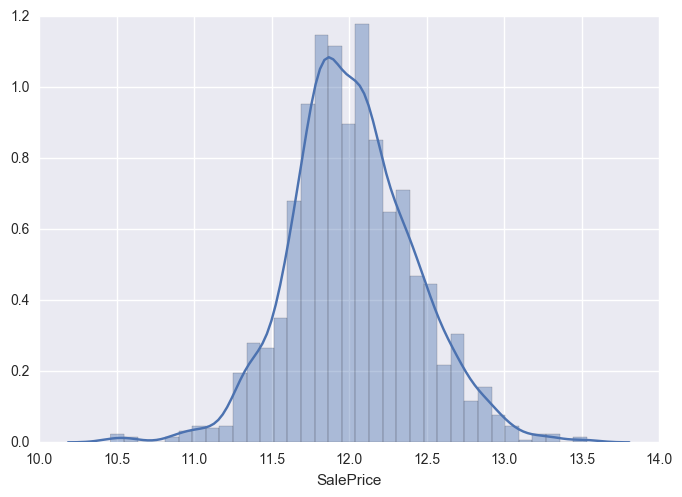

In [7]:
y_train = np.log1p(y_train)
sns.distplot(y_train)

In [3]:
numeric_cols = data.columns[data.dtypes != 'object']
nonNumeric_cols = data.columns[data.dtypes == 'object']
allColumns = data.columns

In [4]:
nonNumeric_cols
numeric_cols
allColumns
nonNumeric_cols

Index([u'MSSubClass', u'MSZoning', u'Street', u'Alley', u'LotShape',
       u'LandContour', u'Utilities', u'LotConfig', u'LandSlope',
       u'Neighborhood', u'Condition1', u'Condition2', u'BldgType',
       u'HouseStyle', u'RoofStyle', u'RoofMatl', u'Exterior1st',
       u'Exterior2nd', u'MasVnrType', u'ExterQual', u'ExterCond',
       u'Foundation', u'BsmtQual', u'BsmtCond', u'BsmtExposure',
       u'BsmtFinType1', u'BsmtFinType2', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'KitchenQual', u'Functional',
       u'FireplaceQu', u'GarageType', u'GarageFinish', u'GarageQual',
       u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence', u'MiscFeature',
       u'SaleType', u'SaleCondition'],
      dtype='object')

In [5]:
def getdummies(df,col):
    dummy = pd.get_dummies(df[col],prefix=col)
    del df[col]
    return df.join(dummy)

In [7]:
#initial columns.

data = pd.concat((train_data, test_data), axis=0)
sampledata = data.copy(deep=True)
#sampledata['TotFlrSF'] = data['1stFlrSF'] + data['2ndFlrSF']

for col in data.columns:
    if col not in ['LotConfig','LandSlope','LotShape','Utilities','LandContour','YearBuilt','SaleType','Neighborhood',
                   'MSSubClass','MiscVal']:
    #if col not in  ['LotConfig','Utilities','MSSubClass','MSZoning','Alley','LotShape','LotFrontage','LotArea','LandSlope','Neighborhood','OverallCond','LandContour',
    #               'Condition1','Street','Condition2']:
        del sampledata[col]       
'''
data['TotFlrSF'] = data['1stFlrSF'] + data['2ndFlrSF']
data['TotFlrSF'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch']
for col in ['1stFlrSF','2ndFlrSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']:
    del data[col]
'''
#for col in sampledata.columns:
#    print sampledata[col].dtype
print len(sampledata.columns)
sampledata.head()
#print sampledata.columns


10


,MSSubClass,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,YearBuilt,MiscVal,SaleType
Id,,,,,,,,,,
1,60,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,2003,0,WD
2,20,Reg,Lvl,AllPub,FR2,Gtl,Veenker,1976,0,WD
3,60,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,2001,0,WD
4,70,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,1915,0,WD
5,60,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,2000,0,WD


In [8]:
print sampledata.isnull().sum()

MSSubClass      0
LotShape        0
LandContour     0
Utilities       2
LotConfig       0
LandSlope       0
Neighborhood    0
YearBuilt       0
MiscVal         0
SaleType        1
dtype: int64


In [462]:
meansampledata = sampledata.mean()
sampledata = sampledata.fillna(meansampledata)

In [463]:
print sampledata.isnull().sum()

MSSubClass      0
LotShape        0
LandContour     0
Utilities       2
LotConfig       0
LandSlope       0
Neighborhood    0
YearBuilt       0
MiscVal         0
SaleType        1
dtype: int64


In [470]:
#Removing missing values and relacing with mean values in all columns.
meancoldata = data.mean()
#meancoldata.head()
data = data.fillna(meancoldata)

In [ ]:
#for col in allColumns:
#    sampledata[col] = data[col]
#    if sampledata[col].dtype == 'object':
#        sampledata = getdummies(sampledata,col)
    
#sampledata.head()

In [287]:
#Normalizing numeric columns
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [200]:
#from sklearn import grid_search
from sklearn import linear_model
linreg = linear_model.LinearRegression(fit_intercept=True,copy_X=True,n_jobs=-1)
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import sqrt
#parameters = {}
#reg = grid_search.GridSearchCV(reg, parameters)

In [466]:
import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore')
#Replacing NAN in numerical columns


subsampledata = sampledata.copy(deep=True)
#dont run for initial column
toterror = {}
for col in allColumns:
    if col not in sampledata.columns:
        subsampledata[col] = data[col]
        #print sampledata.head()
        #numeric_cols = data.columns[data.dtypes != 'object']
        for sampcol in subsampledata.columns:
            #print sampcol
            #print subsampledata.head()
            if subsampledata[sampcol].dtype == 'object':
                subsampledata = getdummies(subsampledata,sampcol)
            #elif subsampledata[sampcol].dtype == 'int64' or subsampledata[sampcol].dtype == 'float64':
            #print subsampledata[col].head()
            #    subsampledata[sampcol] = scalar.fit_transform(subsampledata[sampcol])
            #print subsampledata[col].head()
        #print subsampledata.head()
        #for col in subsampledata.columns:
        #    print subsampledata[col].dtype,
        #print 
        #print y_train.dtype
        X_train = subsampledata[:train_data.shape[0]]
        #print X_train.head()
        #X_test = subsampledata[train_data.shape[0]:]
        skf = StratifiedKFold(y_train, n_folds=10,shuffle=True, random_state=None)
        n = 1
        locerror = []
        for train_index,test_index in skf:
            #print n
            n += 1
            #try:
            #print sampX_train.head()
            sampX_train, sampX_test = X_train.iloc[train_index], X_train.iloc[test_index]
            sampy_train, sampy_test = y_train.iloc[train_index], y_train.iloc[test_index]
            linreg.fit(sampX_train,sampy_train)
            y_pred = linreg.predict(sampX_test)
            #locerror.append((np.mean((linreg.predict(sampX_test) - sampy_test) ** 2))**0.5)
            locerror.append(sqrt(mean_squared_error(y_pred, sampy_test)))
            #except:
            ##    print train_index,test_index
            #    break
        #print locerror
        #print error
        #print col,locerror
        toterror[col] = np.mean(locerror)
        
print toterror

{'MasVnrType': 21203.841209230064, 'BsmtFullBath': 278365.95370998955, 'GarageQual': 29843.432647608501, 'Exterior1st': 140.09220919668354, 'GarageFinish': 47731.877676851407, 'GarageYrBlt': 114943.1736982703, 'HalfBath': 106591.42880040179, 'OverallCond': 334048.22760523518, 'LotArea': 0.22695332659741441, 'Fence': 189006.90428994535, 'Electrical': 45634.126664084368, 'BsmtQual': 2205.2413357541463, 'HouseStyle': 145200.53563561724, 'GrLivArea': 27362.586712758861, 'YearRemodAdd': 80631.991278474758, 'MasVnrArea': 86723.692836690083, 'Foundation': 164325.04848477832, 'GarageType': 106384.10950642875, 'BsmtCond': 140798.80020818464, 'HeatingQC': 54670.904058167805, 'LotFrontage': 0.23190469855617665, 'CentralAir': 6.7365248371125928, 'BsmtExposure': 224883.85259032174, 'OverallQual': 115.62662037132846, 'KitchenAbvGr': 46947.8261627178, 'BsmtFinSF1': 553504.27332623373, 'MoSold': 28.641087028125487, 'BsmtHalfBath': 68719.843415289812, 'TotalBsmtSF': 143341.03173354751, 'BsmtFinSF2': 17

In [467]:
col = min(toterror,key=toterror.get)
print col+ ":",toterror[col]

Alley : 0.225041511673


In [296]:
'''

LotArea : 67616.9497448
LandSlope : 3.80920254924e+13
Neighborhood : 1.38848911555e+12
OverallCond : ??
LandContour : 2.32520685722e+12
Condition1 : 188263320109.0
Street :  155331845927.0
Condition2 : 5.54837779491e+12
WoodDeckSF : 2.60291184848e+14

Observation :- error is varying a lot ??
check to see if any issue in our rmse 
'''

'\n\nLotArea : 67616.9497448\nLandSlope : 3.80920254924e+13\nNeighborhood : 1.38848911555e+12\nOverallCond : ??\nLandContour : 2.32520685722e+12\n'

In [ ]:
#Dummy variable creation using pd.getdummies
#def getdummies(df,col):
#    dummy = pd.get_dummies(df[col],prefix=col)
#    del df[col]
#    return df.join(dummy)

In [509]:
meancoldata = data.mean()
data = data.fillna(meancoldata)
X_train = data[:train_data.shape[0]]
X_train = pd.get_dummies(X_train)

In [494]:
#from sklearn.preprocessing import StandardScaler
#stdsc = StandardScaler()
#X_train_std = stdsc.fit_transform(X_train)

In [510]:
'''New feature selection technique being used'''
from sklearn.feature_selection import VarianceThreshold
threshold = 0.90
selector = VarianceThreshold()
selector.fit(X_train)
VarThreshold_cols = X_train.columns[selector.variances_ > threshold]

In [522]:
VarThreshold_cols[0:15]

Index([u'LotFrontage', u'LotArea', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'MasVnrArea', u'BsmtFinSF1',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF',
       u'LowQualFinSF', u'GrLivArea'],
      dtype='object')

In [521]:
from sklearn.feature_selection import f_regression, SelectKBest
X_scored = SelectKBest(score_func=f_regression, k='all').fit(X_train, y_train)
feature_scoring = pd.DataFrame({
        'feature': X_train.columns,
        'score': X_scored.scores_
    })

feat_scored_15 = feature_scoring.sort_values('score', ascending=False).head(15)['feature'].values
print len(feat_scored_15)
feat_scored_15

15


array(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'ExterQual_TA', 'FullBath', 'YearBuilt',
       'YearRemodAdd', 'KitchenQual_TA', 'TotRmsAbvGrd',
       'Foundation_PConc', 'ExterQual_Gd', 'GarageYrBlt'], dtype=object)

In [526]:
from sklearn.feature_selection import RFE
rfe = RFE(linreg, 15)
rfe.fit(X_train, y_train)

feature_rfe_scoring = pd.DataFrame({
        'feature': X_train.columns,
        'score': rfe.ranking_
    })

feat_rfe_15 = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
print len(feat_rfe_15)
feat_rfe_15

15


array(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Utilities_AllPub',
       'Utilities_NoSeWa', 'KitchenQual_Ex', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageQual_Ex'], dtype=object)

In [528]:
features = np.hstack([
        VarThreshold_cols[0:15], 
        feat_scored_15,
        feat_rfe_15
    ])
features = np.unique(features)
print len(features)
features

30


array(['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_PConc', 'FullBath',
       'GarageArea', 'GarageCars', 'GarageQual_Ex', 'GarageYrBlt',
       'GrLivArea', 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MasVnrArea', 'OverallCond', 'OverallQual', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'Utilities_AllPub', 'Utilities_NoSeWa', 'YearBuilt',
       'YearRemodAdd'], dtype=object)

In [547]:
allcolumns = data.columns
bstFeaturedata = data.copy(deep=True)
#sampledata['TotFlrSF'] = data['1stFlrSF'] + data['2ndFlrSF']
#for col in ['LotConfig','LandSlope','LotShape','Utilities','LandContour','YearBuilt','SaleType','Neighborhood',
#                   'MSSubClass','MiscVal']:
categorical = ['LotConfig','LandSlope','LotShape','Utilities','LandContour','YearBuilt','SaleType','Neighborhood',
                   'MSSubClass','MiscVal']

for col in data.columns:
    if col not in features and col not in categorical:
        del bstFeaturedata[col]
print len(bstFeaturedata.columns)
bstFeaturedata = pd.get_dummies(bstFeaturedata)
print len(bstFeaturedata.columns)
bstFeaturedata.head()

29
89


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Neighborhood_Veenker,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,0,0,0,0,0,0,1
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,1,0,0,0,0,0,0,0,0,1
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,0,0,0,0,0,0,1
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,0,0,0,0,0,0,1
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
Support Vector Machine can be applied not only to classification problems but also to the case of regression. Still it contains all the main features that characterize maximum margin algorithm: a non-linear function is leaned by linear learning machine mapping into high dimensional kernel induced feature space. The capacity of the system is controlled by parameters that do not depend on the dimensionality of feature space.